# Learning and Decision Making

## Laboratory 3: Partially observable Markov decision problems

In the end of the lab, you should submit all code/answers written in the tasks marked as "Activity n. XXX", together with the corresponding outputs and any replies to specific questions posed to the e-mail <adi.tecnico@gmail.com>. Make sure that the subject is of the form [&lt;group n.&gt;] LAB &lt;lab n.&gt;.

### 1. Modeling

Consider once again the princess saving problem described in the Homework and which you described as a POMDP.

Recall that:

* The princess can be in any one of two towers: Tower *A* and Tower *B*. The knight must decide which tower do invade to rescue the princess. 

* The knight can try to _peer_ at the towers, to figure out where the princess may be. 

* When the agent peers, it sees the princess in the right location with a probability of 0.9, and at the wrong location with probability 0.1.

* Whenever the knight invades a tower, the "world" resets.

Consider throughout that $\gamma=0.9$.

---

#### Activity 1.        

Implement your POMDP in Python. In particular,

* Create a list with all the states;
* Create a list with all the actions;
* Create a list with all the observations
* For each action, define a `numpy` array with the corresponding transition probabilities;
* For each action, define a `numpy` array with the corresponding observation probabilities;
* Define a `numpy` array with the cost describing the problem. Make sure that the costs lie in the interval [0,1] and that the cost for peering is in the middle between the cost for saving and being captured.

The order for the states and actions used in the transition probability and cost matrices should match that in the lists of states and actions. 

**Note**: Don't forget to import `numpy`.

---

In [1]:
import numpy as np

# RA = Raid A
# RB = Raid B
# P = Peer
# N = Nothing

X = {'A', 'B'}

A = {'P', 'RA', 'RB'}

Z = {'A', 'B', 'N'}


print("X: %s" % X)
print("A: %s" % A)
print("Z: %s" % Z)


PRB = PRA = np.array([
    [0.5, 0.5],
    [0.5, 0.5]
])

PP = np.array([
    [1, 0],
    [0, 1]
])

ORA = ORB = np.array([
    [0, 0, 1],
    [0, 0, 1]
])


OP = np.array([
    [0.9, 0.1, 0],
    [0.1, 0.9, 0]
])


C = np.array([
    [0, 1, 0.1],
    [1, 0, 0.1]
])



print("\nPRB = PRA =\n%s" % PRA)
print("\nPP =\n%s" % PP)
print("\nORA = ORB =\n%s" % ORA)
print("\nOP =\n%s" % OP)
print("\nC =\n%s" % C)

X: {'A', 'B'}
A: {'P', 'RA', 'RB'}
Z: {'A', 'N', 'B'}

PRB = PRA =
[[ 0.5  0.5]
 [ 0.5  0.5]]

PP =
[[1 0]
 [0 1]]

ORA = ORB =
[[0 0 1]
 [0 0 1]]

OP =
[[ 0.9  0.1  0. ]
 [ 0.1  0.9  0. ]]

C =
[[ 0.   1.   0.1]
 [ 1.   0.   0.1]]


### 2. Sampling

You are now going to sample random trajectories of your POMDP and observe the impact it has on the corresponding belief.

---

#### Activity 2.

Generate a random POMDP trajectory using a uniformly random policy. In particular, from a random initial state $x_0$ generate:

1. A sequence of 10,000 states by selecting the actions uniformly at random;
2. The corresponding sequence of 10,000 actions;
3. The corresponding sequence of 10,000 observations.

---

In [9]:
states = np.zeros( (10001, 1) , dtype = np.int8)
actions = np.zeros( (10000, 1), dtype = np.int8)
observations = np.zeros( (10000, 1), dtype = np.int8)

policy = [1./3, 1./3, 1./3]

Probs = [PRA, PRB, PP]

Obs = [ORA, ORB, OP]


states[0] = np.random.choice(2, p=[1./2, 1./2])

#print(states[0][0])
#print(np.random.choice(3, p=policy))
#print(np.random.choice(3, p=Obs[0][0]))


for i in range(0, 10000):
    action = np.random.choice(3, p=policy)
    
    actions[i] = action
    states[i+1] = np.random.choice(2, p=Probs[action][states[i][0]])
    observations[i] = np.random.choice(3, p=Obs[action][states[i+1][0]])
    
    
    

print(actions)
print(states)
print(observations)
    

[[2]
 [1]
 [2]
 ..., 
 [0]
 [1]
 [1]]
[[0]
 [0]
 [1]
 ..., 
 [1]
 [1]
 [1]]
[[0]
 [2]
 [1]
 ..., 
 [2]
 [2]
 [2]]


---

#### Activity 3.

For the POMDP trajectory generated in Activity 2, compute the corresponding sequence of beliefs, assuming that the initial belief is $\mathbf{b}_0=[0.5, 0.5]$. Report the resulting beliefs, ignoring duplicate beliefs or beliefs whose distance is smaller than $10^{-3}$.

**Note 1:** You may want to define a function `belief_update` that receives a belief, an action and an observation and returns the updated belief.

**Note 2:** To compute the distance between vectors, you may find useful `numpy`'s function `linalg.norm`.


---

In [13]:
error = 1e-3

b0 = [0.5, 0.5]

beliefs = []
beliefs.append(b0)


def belief_update(b, a, o):
    newb = np.dot(np.dot(b, a), o) / sum(np.dot(np.dot(b, a), o))
    return newb

def check_new_belief(newb):
    append = True
    for b in beliefs:
        if( np.linalg.norm(b - newb) <= error):
            append = False
    if(append == True):
        beliefs.append(newb)


for i in range(0, 10000):
    for b in beliefs:
        newb = belief_update(b, 
                             Probs[ actions[i][0] ], 
                             np.diag( Obs[ actions[i][0] ][ :, observations[i][0] ] ))
        check_new_belief(newb)
    
    
print(beliefs)
print(len(beliefs), "beliefs")
    
    

[[0.5, 0.5], array([ 0.9,  0.1]), array([ 0.98780488,  0.01219512]), array([ 0.99863014,  0.00136986]), array([  9.99847607e-01,   1.52392563e-04]), array([ 0.1,  0.9]), array([ 0.01219512,  0.98780488]), array([ 0.00136986,  0.99863014]), array([  1.52392563e-04,   9.99847607e-01])]
9 beliefs


### 3. Solution methods

In this section you are going to compare different non-exact solution methods.

---

#### Activity 4

Compute the solution for the underlying MDP and report the corresponding optimal policy and optimal cost-to-go. 

** Note:** You may reuse code from previous labs.

---

In [30]:
gama = 0.9
pi = np.ones( (2,3) ) / 3
Q = np.zeros( (2,3) )
quit = False
i = 0
I = np.eye(2)


ca = C[:,0,None]
cb = C[:,1,None]
cp = C[:,2,None]


while not quit:
    Cpi = np.diag(pi[:, 0]).dot(ca) + np.diag(pi[:, 1]).dot(cb) + np.diag(pi[:, 2]).dot(cp)
    Ppi = np.diag(pi[:, 0]).dot(PRA) + np.diag(pi[:, 1]).dot(PRB) + np.diag(pi[:, 2]).dot(PP)
    J = np.linalg.inv(I - gama * Ppi).dot(Cpi)
    
    Qa = ca + gama * PRA.dot(J)
    Qb = cb + gama * PRB.dot(J)
    Qp = cp + gama * PP.dot(J)
    
    Q[:, 0, None] = Qa
    Q[:, 1, None] = Qb
    Q[:, 2, None] = Qp
    
    pinew = np.zeros((2, 3))
    pinew[:, 0, None] = np.isclose(Qa, np.min([Qa, Qb, Qp], axis = 0), atol=1e-8, rtol=1e-8).astype(int)
    pinew[:, 1, None] = np.isclose(Qb, np.min([Qa, Qb, Qp], axis = 0), atol=1e-8, rtol=1e-8).astype(int)
    pinew[:, 2, None] = np.isclose(Qp, np.min([Qa, Qb, Qp], axis = 0), atol=1e-8, rtol=1e-8).astype(int)
    
    pinew = pinew / np.sum(pinew, axis=1, keepdims=True)
    
    quit = (pi == pinew).all()
    pi = pinew
    i += 1

    
print("Q = \n%s\n" % Q)
#print(i)
print("pi = \n%s\n" % pi)

Policy = pi

Pp = Policy[:, 0, None]*PRA + Policy[:, 1, None]*PRB + Policy[:, 2, None]*PP
Cp = (Policy * C).sum(axis=1)

#print(Pp)
#print(Cp)


Jpi = np.dot(np.linalg.inv(I - gama * PRA), Cp)

print("Cost-to-go =\n%s\n" % Jpi)

Q = 
[[ 0.   1.   0.1]
 [ 1.   0.   0.1]]

pi = 
[[ 1.  0.  0.]
 [ 0.  1.  0.]]

Cost-to-go =
[ 0.  0.]



---

#### Activity 5

For each of the beliefs computed in Activity 3, compute the action prescribed by:

* The MLS heuristic;
* The AV heuristic;
* The Q-MDP heuristic.

---

In [58]:
OptimalCost = Q
OptimalPolicy = pi
print(OptimalCost)

mls = []
av = []
q_mdp = []

def MLS(belief):
    state = np.argmax(belief)
    mls.append( np.argmax(OptimalPolicy[state]) )
    return np.argmax(OptimalPolicy[state])

def AV(belief):
    av.append( np.argmax(np.dot(belief, OptimalPolicy)) )
    return np.argmax(np.dot(belief, OptimalPolicy))
    

def Q_MDP(belief):
    h = np.dot(belief, OptimalCost)
    q_mdp.append( np.argmin(h) )
    return np.argmin(h)
    

i = 0
for b in beliefs:
    print("i = %d" % i)
    print("MLS(%s) = %s" % (b, MLS(b)))
    print("AV(%s) = %s" % (b, AV(b)))
    print("Q_MDP(%s) = %s" % (b, Q_MDP(b)))
    i+=1
    
    

[[ 0.   1.   0.1]
 [ 1.   0.   0.1]]
i = 0
MLS([0.5, 0.5]) = 0
AV([0.5, 0.5]) = 0
Q_MDP([0.5, 0.5]) = 2
i = 1
MLS([ 0.9  0.1]) = 0
AV([ 0.9  0.1]) = 0
Q_MDP([ 0.9  0.1]) = 0
i = 2
MLS([ 0.98780488  0.01219512]) = 0
AV([ 0.98780488  0.01219512]) = 0
Q_MDP([ 0.98780488  0.01219512]) = 0
i = 3
MLS([ 0.99863014  0.00136986]) = 0
AV([ 0.99863014  0.00136986]) = 0
Q_MDP([ 0.99863014  0.00136986]) = 0
i = 4
MLS([  9.99847607e-01   1.52392563e-04]) = 0
AV([  9.99847607e-01   1.52392563e-04]) = 0
Q_MDP([  9.99847607e-01   1.52392563e-04]) = 0
i = 5
MLS([ 0.1  0.9]) = 1
AV([ 0.1  0.9]) = 1
Q_MDP([ 0.1  0.9]) = 1
i = 6
MLS([ 0.01219512  0.98780488]) = 1
AV([ 0.01219512  0.98780488]) = 1
Q_MDP([ 0.01219512  0.98780488]) = 1
i = 7
MLS([ 0.00136986  0.99863014]) = 1
AV([ 0.00136986  0.99863014]) = 1
Q_MDP([ 0.00136986  0.99863014]) = 1
i = 8
MLS([  1.52392563e-04   9.99847607e-01]) = 1
AV([  1.52392563e-04   9.99847607e-01]) = 1
Q_MDP([  1.52392563e-04   9.99847607e-01]) = 1


---

#### Activity 6

Suppose that the optimal cost-to-go function for the POMDP can be represented using the $\alpha$-vectors

$$
\left\{
\begin{bmatrix}
2.795\\
3.795
\end{bmatrix},
\begin{bmatrix}
3.795\\
2.795
\end{bmatrix},
\begin{bmatrix}
3.105\\
3.105
\end{bmatrix}\right\}$$

corresponding to the actions 'Invade Tower A', 'Invade Tower B' and 'Peer', respectively. Represent the optimal cost-to-go function and compare the optimal policy with the MDP heuristics from Activity 5 in the beliefs computed in Activity 3.

** Note: ** Don't forget to import `matplotlib`, and use the magic `%matplotlib notebook`.

---

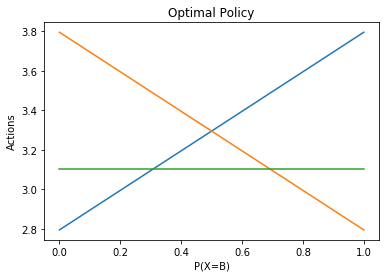

De 0 a cerca de 0.3 que é a intersecção entre Raid A e Peer escolhe-se Raid A. Entre cerca de 0.3 a 0.7, que é a intersecção entre Peer e Raid B, deve-se escolher a acção Peer. De cerca de 0.7 a 1 deve-se escolher a acção Raid B.


In [87]:
import matplotlib.pyplot as plt

OptimalCost = np.array([
    [2.795, 3.795, 3.105],
    [3.795, 2.795, 3.105]
])

#print(OptimalCost)


plt.plot(OptimalCost) #, bins=10, normed=1, rwidth=0.5, range=[-0.5, 9.5])
plt.title("Optimal Policy")
plt.xlabel("P(X=B)")
plt.ylabel("Actions")
plt.show()

print("De 0 a cerca de 0.3 que é a intersecção entre Raid A e Peer escolhe-se Raid A. Entre cerca de 0.3 a 0.7, que é a intersecção entre Peer e Raid B, deve-se escolher a acção Peer. De cerca de 0.7 a 1 deve-se escolher a acção Raid B.")

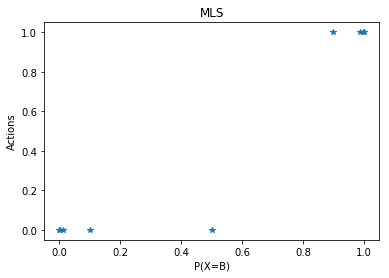

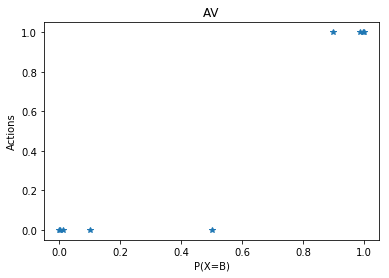

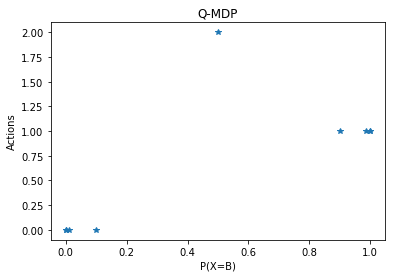

Com base na pequena amostra nota-se que tanto MLS como AV nunca escolhem a acção Peer, e escolhem a acção A ou B desde que a probabilidade destes seja maior que 0.5
Para Q-MDP nota-se que quando a probabilidade é igual para ambos os estados a heurística prefere fazer Peer.
Comparando com a Optimal Policy, a heurística Q-MDP é a que se aproxima mais à Optimal Policy pois quando a probabilidade é igual para ambos os estados a heurística faz Peer que é aquilo que a Optimal Policy recomenda.


In [91]:
b_map = [x[1] for x in beliefs]
#print(b_map)


plt.plot(b_map, mls, '*') #, bins=10, normed=1, rwidth=0.5, range=[-0.5, 9.5])
plt.title("MLS")
plt.xlabel("P(X=B)")
plt.ylabel("Actions")
plt.show()


plt.plot(b_map, av, '*') #, bins=10, normed=1, rwidth=0.5, range=[-0.5, 9.5])
plt.title("AV")
plt.xlabel("P(X=B)")
plt.ylabel("Actions")
plt.show()


plt.plot(b_map, q_mdp, '*') #, bins=10, normed=1, rwidth=0.5, range=[-0.5, 9.5])
plt.title("Q-MDP")
plt.xlabel("P(X=B)")
plt.ylabel("Actions")
plt.show()


print("Com base na pequena amostra nota-se que tanto MLS como AV nunca escolhem a acção Peer, e escolhem a acção A ou B desde que a probabilidade destes seja maior que 0.5")
print("Para Q-MDP nota-se que quando a probabilidade é igual para ambos os estados a heurística prefere fazer Peer.")
print("Comparando com a Optimal Policy, a heurística Q-MDP é a que se aproxima mais à Optimal Policy pois quando a probabilidade é igual para ambos os estados a heurística faz Peer que é aquilo que a Optimal Policy recomenda.")